In [12]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import scanpy as sc
from util import standard_scanpy, normalize_rows, mse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from sklearn.utils.extmath import randomized_svd

In [5]:
paul = sc.read('/Users/josh/src/noise2self-single-cell/data/paul/paul.h5ad')

In [6]:
paul = standard_scanpy(paul)

In [9]:
x = paul.X.astype(np.int)

x1 = np.random.binomial(x, 0.5)
x2 = x - x1

In [13]:
x1_norm = np.sqrt(x1)
x2_norm = np.sqrt(x2)

U, S, V = randomized_svd(x1_norm, n_components=50, random_state=42)

ae_loss = []
ss_loss = []
gt_loss = []
k_range = np.arange(1, 30)
for k in k_range:
    x_pred = U[:,:k].dot(np.diag(S[:k])).dot(V[:k,:])
    ae_loss.append(mse(x_pred, x1_norm))
    ss_loss.append(mse(x_pred, x2_norm))
k_opt = k_range[np.argmin(ss_loss)]
                
print(k_opt)

7


Text(0.5,1,'Reconstruction Error')

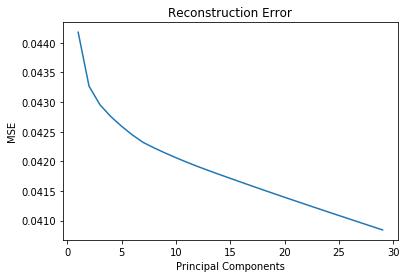

In [19]:
plt.plot(k_range, ae_loss)
plt.xlabel("Principal Components")
plt.ylabel("MSE")
plt.title("Reconstruction Error")

Text(0.5,1,'Norm of Singular Values')

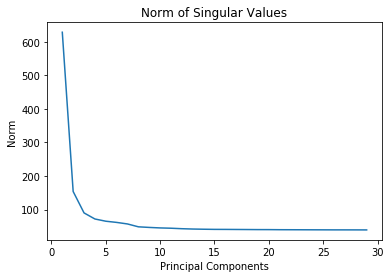

In [22]:
plt.plot(k_range, S[:len(k_range)])
plt.xlabel("Principal Components")
plt.ylabel("Norm")
plt.title("Norm of Singular Values")

Text(0.5,1,'Self-Supervised Loss')

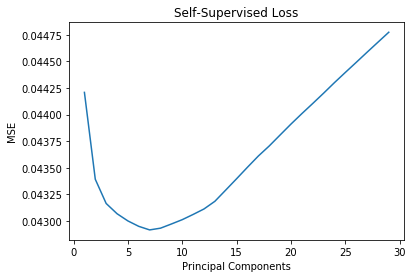

In [21]:
plt.plot(k_range, ss_loss)
plt.xlabel("Principal Components")
plt.ylabel("MSE")
plt.title("Self-Supervised Loss")

In [ ]:
sc.pp.normalize_per_cell(denoised_adata)
sc.pp.sqrt(denoised_adata)
sc.pl.scatter(denoised_adata, x='Mpo', y='Klf1', color='Ifitm1', cmap = 'magma')

In [31]:
import magic
def compute_diff_op(x, lazy_p = 0):
    median_counts = np.median(x.sum(axis=1)) / 2

    X = np.sqrt(normalize_rows(x, median_counts))

    magic_op = magic.MAGIC()
    magic_op.fit(X)

    diff_op = np.array(magic_op.diff_op.todense())

    diff_op = (1 - lazy_p) * diff_op + lazy_p * np.eye(diff_op.shape[0])
    return diff_op

In [32]:
diff_op = compute_diff_op(x1, lazy_p = 0)

Running MAGIC on 2417 cells and 10783 genes.
Calculating graph and diffusion operator...
  Calculating PCA...


/Users/josh/.local/lib/python3.6/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculated PCA in 3.02 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.79 seconds.
  Calculating affinities...
  Calculated affinities in 2.31 seconds.
Calculated graph and diffusion operator in 6.30 seconds.


Text(0.5,0,'Diffusion Time')

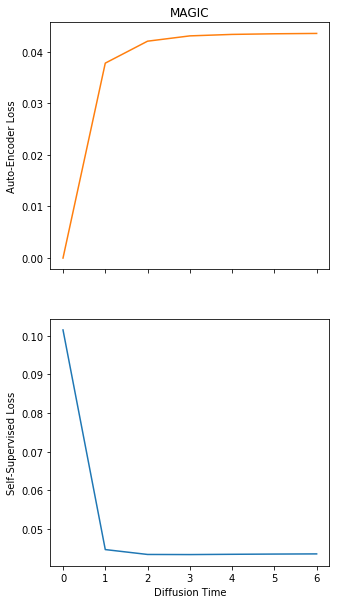

In [34]:
denoised = np.sqrt(x1)
ss_loss, gt_loss, ae_loss = [], [], []
max_t = 7

t_range = np.arange(max_t)

for t in t_range:
    ss_loss.append(mse(denoised, np.sqrt(x2)))
    ae_loss.append(mse(denoised, np.sqrt(x1)))

    denoised = diff_op.dot(denoised)

f, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(5, 10))

ax0.plot(t_range, ae_loss, color = 'C1')
ax0.set_title("MAGIC")
ax0.set_ylabel('Auto-Encoder Loss')

ax1.plot(t_range, ss_loss)
ax1.set_ylabel('Self-Supervised Loss')
ax1.set_xlabel('Diffusion Time')

In [ ]:
data = paul.copy()
data.X = 
plt.figure(figsize=(6,6))

plt.scatter(data[:,'GATA1'].X + j1, data[:,'KLF1'].X + j2, 
            c = data[:,'PUS1'].X ,cmap='inferno', s=1)

plt.xlabel('GATA1')
plt.ylabel('KLF1')
# plt.yticks([])
# plt.xticks([])

# Hide the right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)

plt.tight_layout()

# plt.savefig(dir + 'raw_data_noaxis.png')
sc.pl.scatter(denoised_adata, x='Mpo', y='Klf1', color='Ifitm1', cmap = 'magma')